In [14]:
#Installing packages
library(data.table)
library(tidyverse)
library(stringi)
library(tidyr)
install.packages("fixest")
library(fixest)
install.packages("estimatr")
library(estimatr)
install.packages("readxl")
library(readxl)
library(zoo)
library(ggplot2)
library(sandwich)
library(lmtest)

Warning message:
"package 'fixest' is in use and will not be installed"
Warning message:
"package 'estimatr' is in use and will not be installed"
Warning message:
"package 'readxl' is in use and will not be installed"


In [118]:
final <- read.csv("C:\\Users\\joyse\\Desktop\\14.33\\Data\\final_merge_withoutB_controls.csv")


In [119]:
colnames(final)

[1] "X"                                           
  [2] "STATE"                                       
  [3] "Year"                                        
  [4] "TotPop_18to24"                               
  [5] "TotPop_25to34"                               
  [6] "TotPop_35to44"                               
  [7] "TotPop_45to64"                               
  [8] "TotPop_65"                                   
  [9] "TotCPop_18to24"                              
 [10] "TotCPop_25to34"                              
 [11] "TotCPop_35to44"                              
 [12] "TotCPop_45to64"                              
 [13] "TotCPop_65"                                  
 [14] "TotReg_18to24"                               
 [15] "TotReg_25to34"                               
 [16] "TotReg_35to44"                               
 [17] "TotReg_45to64"                               
 [18] "TotReg_65"                                   
 [19] "PRegT_18to24"                                
 [20] "PRegT_25to34"                                
 [21] "PRegT_35to44"                                
 [22] "PRegT_45to64"                                
 [23] "PRegT_65"                                    
 [24] "PRegC_18to24"                                
 [25] "PRegC_25to34"                                
 [26] "PRegC_35to44"                                
 [27] "PRegC_45to64"                                
 [28] "PRegC_65"                                    
 [29] "TotVote_18to24"                              
 [30] "TotVote_25to34"                              
 [31] "TotVote_35to44"                              
 [32] "TotVote_45to64"                              
 [33] "TotVote_65"                                  
 [34] "PVoteT_18to24"                               
 [35] "PVoteT_25to34"                               
 [36] "PVoteT_35to44"                               
 [37] "PVoteT_45to64"                               
 [38] "PVoteT_65"                                   
 [39] "PVoteC_18to24"                               
 [40] "PVoteC_25to34"                               
 [41] "PVoteC_35to44"                               
 [42] "PVoteC_45to64"                               
 [43] "PVoteC_65"                                   
 [44] "TotPop_Total"                                
 [45] "TotPop_Male"                                 
 [46] "TotPop_Female"                               
 [47] "TotPop_Whitealone"                           
 [48] "TotPop_WhitenonHispanicalone"                
 [49] "TotPop_Blackalone"                           
 [50] "TotPop_Asianalone"                           
 [51] "TotPop_Hispanicofanyrace"                    
 [52] "TotPop_Whitealoneorincombination"            
 [53] "TotPop_Blackaloneorincombination"            
 [54] "TotPop_Asianaloneorincombination"            
 [55] "TotCPop_Total"                               
 [56] "TotCPop_Male"                                
 [57] "TotCPop_Female"                              
 [58] "TotCPop_Whitealone"                          
 [59] "TotCPop_WhitenonHispanicalone"               
 [60] "TotCPop_Blackalone"                          
 [61] "TotCPop_Asianalone"                          
 [62] "TotCPop_Hispanicofanyrace"                   
 [63] "TotCPop_Whitealoneorincombination"           
 [64] "TotCPop_Blackaloneorincombination"           
 [65] "TotCPop_Asianaloneorincombination"           
 [66] "TotReg_Total"                                
 [67] "TotReg_Male"                                 
 [68] "TotReg_Female"                               
 [69] "TotReg_Whitealone"                           
 [70] "TotReg_WhitenonHispanicalone"                
 [71] "TotReg_Blackalone"                           
 [72] "TotReg_Asianalone"                           
 [73] "TotReg_Hispanicofanyrace"                    
 [74] "TotReg_Whitealoneorincombination"            
 [75] "TotReg_Blackaloneorincombination"            
 [76] "TotReg_Asianaloneori

In [120]:
# Filter final dataframe for Treatment=1 and Treatment=0
treatment_1 <- final[final$Treatment == 1, ]
treatment_0 <- final[final$Treatment == 0, ]

In [121]:
pres_years=c(2000,2004,2008,2012,2016,2020)

# 18 to 24 Year Olds Voted

## Pooled Regression

In [122]:
#Pooled regression
options(scipen = 999)
model <- lm(PVoteC_18to24 ~ post_2013 + Treatment + Semi_treatment + post_2013*Treatment + post_2013*Semi_treatment+ pres_year + swing_ever + senate + 
             Percent_25andOver_BachelororMore_2006to2008  + TotCPop_18to24_2012 
            + rGDPperCap_2012 + Covid_mrate_2020, data = final)

# Obtain robust standard errors
robust_se <- sqrt(diag(vcovHC(model)))

# Print summary output table with robust standard errors
summary_table <- coeftest(model, vcov = vcovHC(model))
print(summary_table)


t test of coefficients:

                                                Estimate   Std. Error t value
(Intercept)                                  5.582324855  3.037487460  1.8378
post_2013                                    4.615109739  0.961335757  4.8007
Treatment                                    3.530617632  1.302071726  2.7115
Semi_treatment                               1.449391728  1.801640095  0.8045
pres_year                                   22.357161096  0.738295694 30.2821
swing_ever                                   4.479127102  0.947812243  4.7258
senate                                       0.903415724  0.798873066  1.1309
Percent_25andOver_BachelororMore_2006to2008  0.366356508  0.098235553  3.7294
TotCPop_18to24_2012                         -0.001266544  0.000800940 -1.5813
rGDPperCap_2012                              0.000084032  0.000057048  1.4730
Covid_mrate_2020                             0.001008769  0.014976593  0.0674
post_2013:Treatment                   

In [123]:
summary(model)


Call:
lm(formula = PVoteC_18to24 ~ post_2013 + Treatment + Semi_treatment + 
    post_2013 * Treatment + post_2013 * Semi_treatment + pres_year + 
    swing_ever + senate + Percent_25andOver_BachelororMore_2006to2008 + 
    TotCPop_18to24_2012 + rGDPperCap_2012 + Covid_mrate_2020, 
    data = final)

Residuals:
     Min       1Q   Median       3Q      Max 
-26.4391  -5.3451  -0.2516   5.3309  26.0863 

Coefficients:
                                               Estimate  Std. Error t value
(Intercept)                                  5.58232485  3.02280947   1.847
post_2013                                    4.61510974  0.91504971   5.044
Treatment                                    3.53061763  1.36904557   2.579
Semi_treatment                               1.44939173  1.71077060   0.847
pres_year                                   22.35716110  0.76804079  29.109
swing_ever                                   4.47912710  0.89412798   5.009
senate                                       0.

In [124]:
nobs(model)

[1] 491

In [125]:
pres_year_slope <- summary_table["pres_year", "Estimate"]

## Yearly Regression

In [126]:
#Pooled regression
options(scipen = 999)
model <- lm(PVoteC_18to24 ~ is_2000 + is_2002 + is_2004  + is_2008 + is_2010  + is_2014 + is_2016
            + is_2018 + is_2020 + Treatment + Semi_treatment+ (is_2000*Treatment) + (is_2002*Treatment) + (is_2004*Treatment) + 
             (is_2008*Treatment)+ (is_2010*Treatment)  + (is_2014*Treatment)+
            (is_2016*Treatment)+ (is_2018*Treatment)+ (is_2020*Treatment) + (is_2000*Semi_treatment) + (is_2002*Semi_treatment)
            + (is_2004*Semi_treatment) + 
             (is_2008*Semi_treatment)+ (is_2010*Semi_treatment)  + (is_2014*Semi_treatment)+
            (is_2016*Semi_treatment)+ (is_2018*Semi_treatment)+ (is_2020*Semi_treatment) + pres_year + swing_ever + senate + 
            rGDPperCap_2012 + Percent_25andOver_BachelororMore_2006to2008 + TotCPop_18to24_2012+
            Covid_mrate_2020,
            data = final)

# Obtain robust standard errors
robust_se <- sqrt(diag(vcovHC(model)))

# Print summary output table with robust standard errors
summary_table <- coeftest(model, vcov = vcovHC(model))
print(summary_table)


t test of coefficients:

                                                 Estimate    Std. Error
(Intercept)                                  25.512984001   2.900791350
is_2000                                      -3.855466039   1.837415597
is_2002                                     -20.961785213   1.562407407
is_2004                                       6.767071144   1.806030231
is_2008                                       6.991791504   1.968027721
is_2010                                     -20.121926330   1.609631688
is_2014                                     -23.508608721   1.558279881
is_2016                                       3.177660153   1.757777464
is_2018                                      -8.491613186   1.542016175
is_2020                                      10.927727221   2.004371093
Treatment                                     4.901940424   4.463983954
Semi_treatment                                2.221206401   2.773371146
swing_ever                            

In [127]:
summary(model)


Call:
lm(formula = PVoteC_18to24 ~ is_2000 + is_2002 + is_2004 + is_2008 + 
    is_2010 + is_2014 + is_2016 + is_2018 + is_2020 + Treatment + 
    Semi_treatment + (is_2000 * Treatment) + (is_2002 * Treatment) + 
    (is_2004 * Treatment) + (is_2008 * Treatment) + (is_2010 * 
    Treatment) + (is_2014 * Treatment) + (is_2016 * Treatment) + 
    (is_2018 * Treatment) + (is_2020 * Treatment) + (is_2000 * 
    Semi_treatment) + (is_2002 * Semi_treatment) + (is_2004 * 
    Semi_treatment) + (is_2008 * Semi_treatment) + (is_2010 * 
    Semi_treatment) + (is_2014 * Semi_treatment) + (is_2016 * 
    Semi_treatment) + (is_2018 * Semi_treatment) + (is_2020 * 
    Semi_treatment) + pres_year + swing_ever + senate + rGDPperCap_2012 + 
    Percent_25andOver_BachelororMore_2006to2008 + TotCPop_18to24_2012 + 
    Covid_mrate_2020, data = final)

Residuals:
     Min       1Q   Median       3Q      Max 
-23.0953  -4.1237  -0.1664   3.5338  22.7507 

Coefficients: (1 not defined because of singulariti

In [128]:
non_missing_rows <- sum(!is.na(final$PVoteC_18to24))

# Print the number of non-missing rows
print(non_missing_rows)

[1] 500


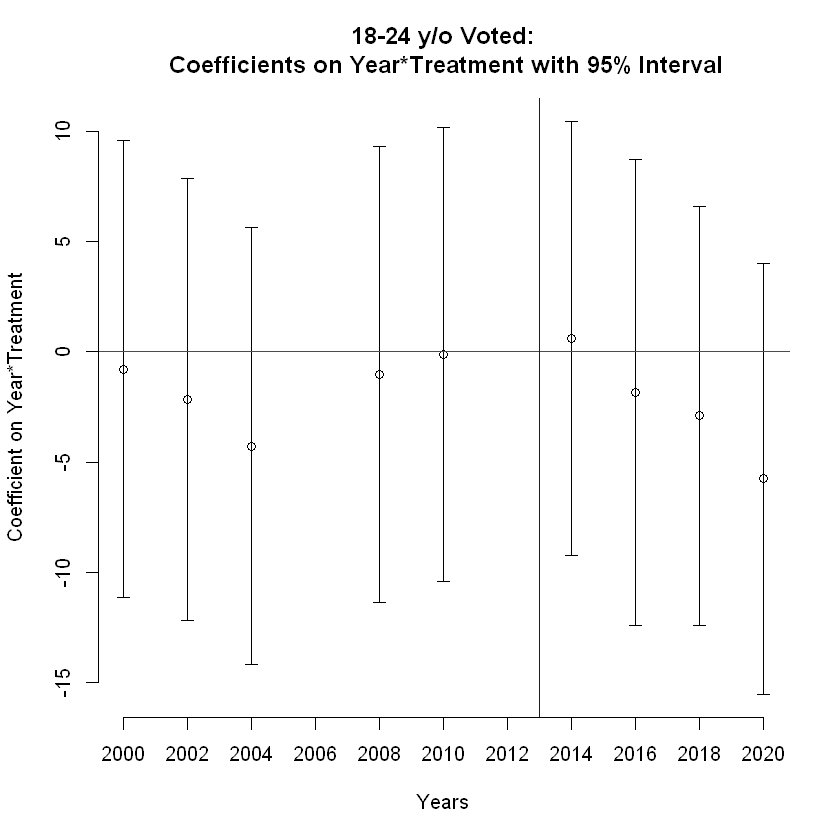

In [129]:
variable_names <- grep("^is_\\d{4}:Treatment", rownames(summary_table), value = TRUE)

# Extract coefficients and standard errors for these variables
coefficients <- summary_table[variable_names, "Estimate"]
std_errors <- summary_table[variable_names, "Std. Error"]

# Combine coefficients and standard errors into a list
coefficients_numeric <- as.numeric(coefficients)
std_errors_numeric <- as.numeric(std_errors)


# Create a vector of years
years <- c(2000, 2002, 2004, 2008, 2010, 2014, 2016, 2018, 2020)

# Plot coefficients with error bars
plot(years, coefficients_numeric, type = "p", ylim = c(min(coefficients_numeric - 1.96*std_errors_numeric), max(coefficients_numeric + 1.96*std_errors_numeric)), 
     xlab = "Years", ylab = "Coefficient on Year*Treatment", main = "18-24 y/o Voted:\n Coefficients on Year*Treatment with 95% Interval", xlim=c(2000,2020), axes=FALSE)

# Add error bars
for (i in 1:length(years)) {
  arrows(years[i], coefficients_numeric[i] - 1.96*std_errors_numeric[i], 
         years[i], coefficients_numeric[i] + 1.96*std_errors_numeric[i], 
         angle = 90, code = 3, length = 0.05)
}

# Add a line at y=0
abline(h = 0, col = "red")

# Add a line at x=2013
abline(v = 2013, col = "blue")
axis(1, at = seq(2000, 2020, by = 2))

# Adding y-axis
axis(2)


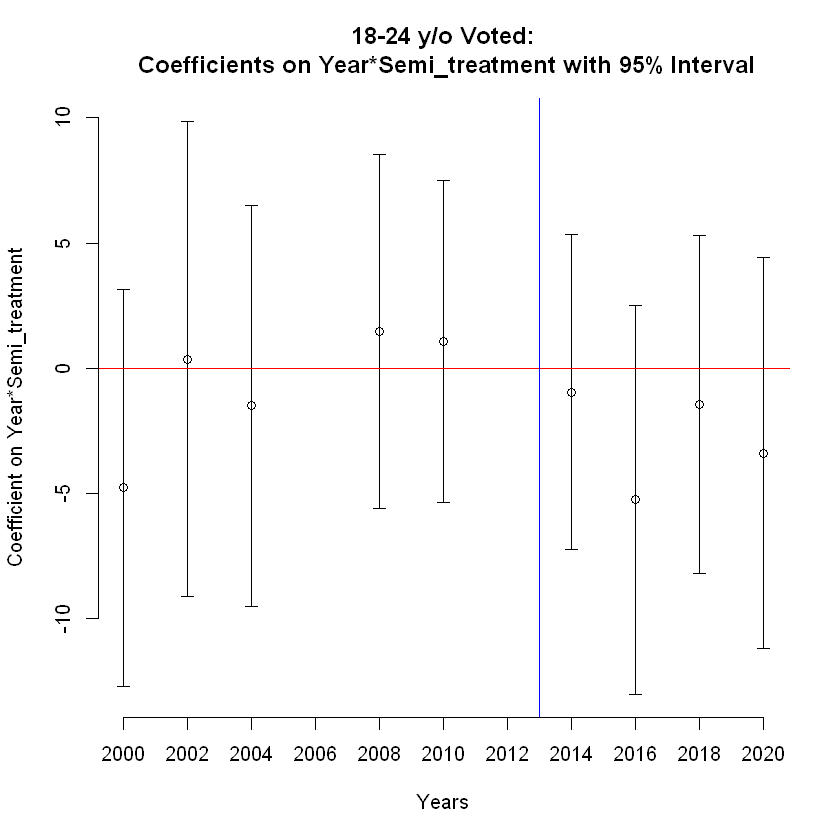

In [130]:
variable_names <- grep("^is_\\d{4}:Semi_treatment", rownames(summary_table), value = TRUE)

# Extract coefficients and standard errors for these variables
coefficients <- summary_table[variable_names, "Estimate"]
std_errors <- summary_table[variable_names, "Std. Error"]

# Combine coefficients and standard errors into a list
coefficients_numeric <- as.numeric(coefficients)
std_errors_numeric <- as.numeric(std_errors)


# Create a vector of years
years <- c(2000, 2002, 2004, 2008, 2010, 2014, 2016, 2018, 2020)

# Plot coefficients with error bars
plot(years, coefficients_numeric, type = "p", ylim = c(min(coefficients_numeric - 1.96*std_errors_numeric), max(coefficients_numeric + 1.96*std_errors_numeric)), 
     xlab = "Years", ylab = "Coefficient on Year*Semi_treatment", main = "18-24 y/o Voted:\n Coefficients on Year*Semi_treatment with 95% Interval", xlim=c(2000,2020), axes=FALSE)

# Add error bars
for (i in 1:length(years)) {
  arrows(years[i], coefficients_numeric[i] - 1.96*std_errors_numeric[i], 
         years[i], coefficients_numeric[i] + 1.96*std_errors_numeric[i], 
         angle = 90, code = 3, length = 0.05)
}

# Add a line at y=0
abline(h = 0, col = "red")

# Add a line at x=2013
abline(v = 2013, col = "blue")
axis(1, at = seq(2000, 2020, by = 2))

# Adding y-axis
axis(2)

## Difference between 18 to 24 and 45 to 64

In [131]:
#Pooled regression
options(scipen = 999)
model <- lm(Dif_45to64_18to24 ~ post_2013 + Treatment + Semi_treatment + post_2013*Treatment + post_2013*Semi_treatment+ pres_year + swing_ever + senate + 
             Percent_25andOver_BachelororMore_2006to2008  + TotCPop_18to24_2012 + TotCPop_45to64_2012+
            + rGDPperCap_2012 + Covid_mrate_2020, data = final)

# Obtain robust standard errors
robust_se <- sqrt(diag(vcovHC(model)))

# Print summary output table with robust standard errors
summary_table <- coeftest(model, vcov = vcovHC(model))
print(summary_table)


t test of coefficients:

                                                 Estimate    Std. Error
(Intercept)                                 36.2802696352  2.5461937794
post_2013                                   -5.9149258374  0.7824057961
Treatment                                   -2.2988254183  1.1634793506
Semi_treatment                               0.6520192613  1.4392755634
pres_year                                   -9.8342565179  0.6039809270
swing_ever                                  -1.3078834207  0.8234942422
senate                                      -0.0096644286  0.6447289127
Percent_25andOver_BachelororMore_2006to2008  0.1178457472  0.0891268516
TotCPop_18to24_2012                          0.0025818559  0.0026641767
TotCPop_45to64_2012                         -0.0019107281  0.0011451571
rGDPperCap_2012                             -0.0000051487  0.0000483175
Covid_mrate_2020                            -0.0052244169  0.0111939174
post_2013:Treatment                   

In [132]:
summary(model)


Call:
lm(formula = Dif_45to64_18to24 ~ post_2013 + Treatment + Semi_treatment + 
    post_2013 * Treatment + post_2013 * Semi_treatment + pres_year + 
    swing_ever + senate + Percent_25andOver_BachelororMore_2006to2008 + 
    TotCPop_18to24_2012 + TotCPop_45to64_2012 + +rGDPperCap_2012 + 
    Covid_mrate_2020, data = final)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.8120  -4.6255   0.0642   4.8578  23.5779 

Coefficients:
                                                Estimate   Std. Error t value
(Intercept)                                 36.280269635  2.471144268  14.682
post_2013                                   -5.914925837  0.746808516  -7.920
Treatment                                   -2.298825418  1.131681794  -2.031
Semi_treatment                               0.652019261  1.419404011   0.459
pres_year                                   -9.834256518  0.626832998 -15.689
swing_ever                                  -1.307883421  0.791703074  -1.652
senate

In [133]:
nobs(model)

[1] 491

## Yearly Regression

In [134]:
#Pooled regression
options(scipen = 999)
model <- lm(Dif_45to64_18to24 ~ is_2000 + is_2002 + is_2004  + is_2008 + is_2010  + is_2014 + is_2016
            + is_2018 + is_2020 + Treatment + Semi_treatment+ (is_2000*Treatment) + (is_2002*Treatment) + (is_2004*Treatment) + 
             (is_2008*Treatment)+ (is_2010*Treatment)  + (is_2014*Treatment)+
            (is_2016*Treatment)+ (is_2018*Treatment)+ (is_2020*Treatment) + (is_2000*Semi_treatment) + (is_2002*Semi_treatment)
            + (is_2004*Semi_treatment) + 
             (is_2008*Semi_treatment)+ (is_2010*Semi_treatment)  + (is_2014*Semi_treatment)+
            (is_2016*Semi_treatment)+ (is_2018*Semi_treatment)+ (is_2020*Semi_treatment) + pres_year + swing_ever + senate + 
            rGDPperCap_2012 + Percent_25andOver_BachelororMore_2006to2008 + TotCPop_18to24_2012+TotCPop_45to64_2012+
            Covid_mrate_2020,
            data = final)

# Obtain robust standard errors
robust_se <- sqrt(diag(vcovHC(model)))

# Print summary output table with robust standard errors
summary_table <- coeftest(model, vcov = vcovHC(model))
print(summary_table)


t test of coefficients:

                                                Estimate   Std. Error t value
(Intercept)                                 27.122775314  2.496703534 10.8634
is_2000                                      4.458641128  1.549862528  2.8768
is_2002                                     12.285061210  1.287612600  9.5410
is_2004                                     -2.584517009  1.392491564 -1.8560
is_2008                                     -5.925805278  1.589734452 -3.7275
is_2010                                      8.110837975  1.291118497  6.2820
is_2014                                      7.517862451  1.436231241  5.2344
is_2016                                     -4.634430118  1.510349134 -3.0684
is_2018                                      0.108041747  1.442331928  0.0749
is_2020                                     -8.446471021  1.660922125 -5.0854
Treatment                                   -1.295304818  3.734419016 -0.3469
Semi_treatment                        

In [135]:
summary(model)


Call:
lm(formula = Dif_45to64_18to24 ~ is_2000 + is_2002 + is_2004 + 
    is_2008 + is_2010 + is_2014 + is_2016 + is_2018 + is_2020 + 
    Treatment + Semi_treatment + (is_2000 * Treatment) + (is_2002 * 
    Treatment) + (is_2004 * Treatment) + (is_2008 * Treatment) + 
    (is_2010 * Treatment) + (is_2014 * Treatment) + (is_2016 * 
    Treatment) + (is_2018 * Treatment) + (is_2020 * Treatment) + 
    (is_2000 * Semi_treatment) + (is_2002 * Semi_treatment) + 
    (is_2004 * Semi_treatment) + (is_2008 * Semi_treatment) + 
    (is_2010 * Semi_treatment) + (is_2014 * Semi_treatment) + 
    (is_2016 * Semi_treatment) + (is_2018 * Semi_treatment) + 
    (is_2020 * Semi_treatment) + pres_year + swing_ever + senate + 
    rGDPperCap_2012 + Percent_25andOver_BachelororMore_2006to2008 + 
    TotCPop_18to24_2012 + TotCPop_45to64_2012 + Covid_mrate_2020, 
    data = final)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.5396  -4.1394  -0.0634   3.9443  18.7032 

Coefficients: (1 not

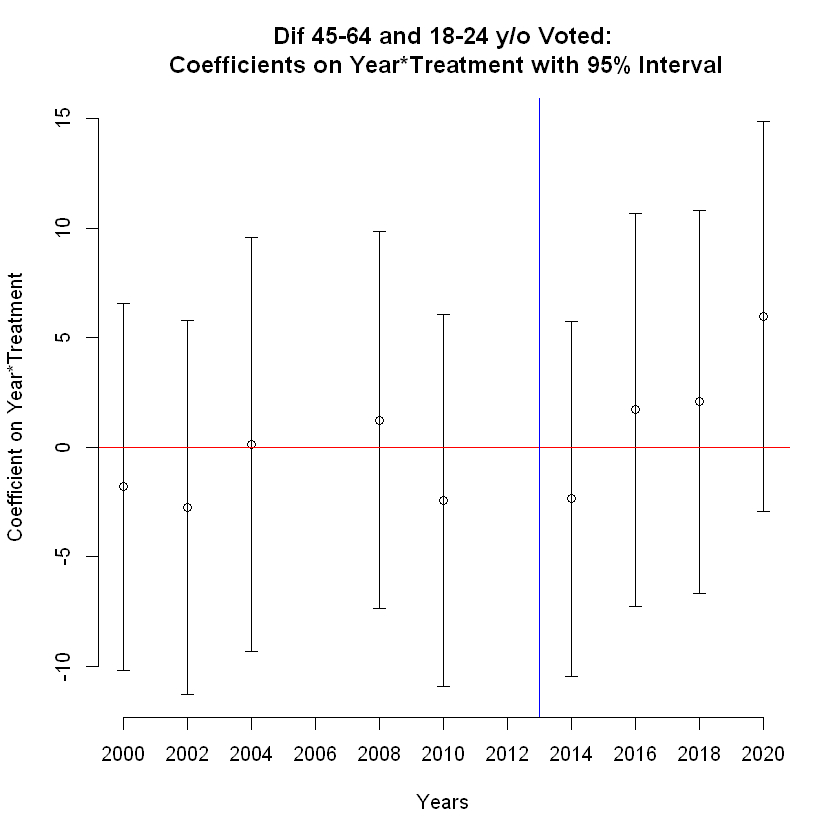

In [137]:
variable_names <- grep("^is_\\d{4}:Treatment", rownames(summary_table), value = TRUE)

# Extract coefficients and standard errors for these variables
coefficients <- summary_table[variable_names, "Estimate"]
std_errors <- summary_table[variable_names, "Std. Error"]

# Combine coefficients and standard errors into a list
coefficients_numeric <- as.numeric(coefficients)
std_errors_numeric <- as.numeric(std_errors)


# Create a vector of years
years <- c(2000, 2002, 2004, 2008, 2010, 2014, 2016, 2018, 2020)

# Plot coefficients with error bars
plot(years, coefficients_numeric, type = "p", ylim = c(min(coefficients_numeric - 1.96*std_errors_numeric), max(coefficients_numeric + 1.96*std_errors_numeric)), 
     xlab = "Years", ylab = "Coefficient on Year*Treatment", main = "Dif 45-64 and 18-24 y/o Voted:\n Coefficients on Year*Treatment with 95% Interval", xlim=c(2000,2020), axes=FALSE)

# Add error bars
for (i in 1:length(years)) {
  arrows(years[i], coefficients_numeric[i] - 1.96*std_errors_numeric[i], 
         years[i], coefficients_numeric[i] + 1.96*std_errors_numeric[i], 
         angle = 90, code = 3, length = 0.05)
}

# Add a line at y=0
abline(h = 0, col = "red")

# Add a line at x=2013
abline(v = 2013, col = "blue")
axis(1, at = seq(2000, 2020, by = 2))

# Adding y-axis
axis(2)


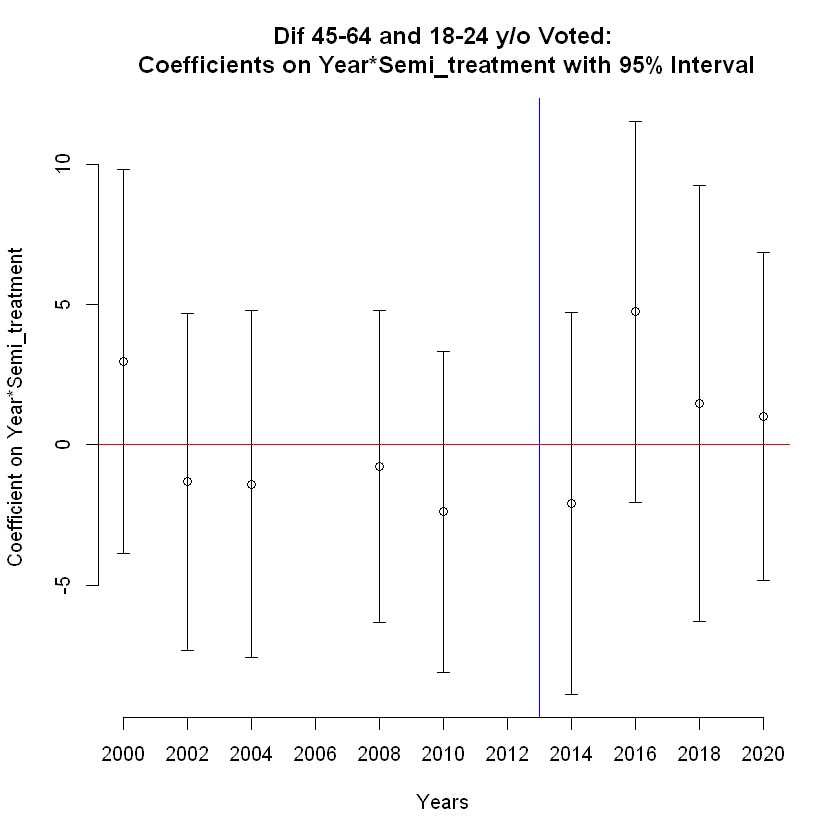

In [138]:
variable_names <- grep("^is_\\d{4}:Semi_treatment", rownames(summary_table), value = TRUE)

# Extract coefficients and standard errors for these variables
coefficients <- summary_table[variable_names, "Estimate"]
std_errors <- summary_table[variable_names, "Std. Error"]

# Combine coefficients and standard errors into a list
coefficients_numeric <- as.numeric(coefficients)
std_errors_numeric <- as.numeric(std_errors)


# Create a vector of years
years <- c(2000, 2002, 2004, 2008, 2010, 2014, 2016, 2018, 2020)

# Plot coefficients with error bars
plot(years, coefficients_numeric, type = "p", ylim = c(min(coefficients_numeric - 1.96*std_errors_numeric), max(coefficients_numeric + 1.96*std_errors_numeric)), 
     xlab = "Years", ylab = "Coefficient on Year*Semi_treatment", main = "Dif 45-64 and 18-24 y/o Voted:\n Coefficients on Year*Semi_treatment with 95% Interval", xlim=c(2000,2020), axes=FALSE)

# Add error bars
for (i in 1:length(years)) {
  arrows(years[i], coefficients_numeric[i] - 1.96*std_errors_numeric[i], 
         years[i], coefficients_numeric[i] + 1.96*std_errors_numeric[i], 
         angle = 90, code = 3, length = 0.05)
}

# Add a line at y=0
abline(h = 0, col = "red")

# Add a line at x=2013
abline(v = 2013, col = "blue")
axis(1, at = seq(2000, 2020, by = 2))

# Adding y-axis
axis(2)

# Black Alone or in Combination Voted

### Pooled Regression

In [139]:
options(scipen = 999)
# Assuming 'y' is the outcome variable and 'a', 'b', and 'c' are the regressors
model <- lm(PVoteC_Blackaloneorincombination ~ post_2013 + Treatment +Semi_treatment + post_2013*Treatment + post_2013*Semi_treatment + pres_year + swing_ever + senate+
             rGDPperCap_2012 + Percent_25andOver_BachelororMore_2006to2008 + TotCPop_Blackaloneorincombination_2012 +
            Covid_mrate_2020 
            , data = final)

# Obtain robust standard errors
robust_se <- sqrt(diag(vcovHC(model)))

# Print summary output table with robust standard errors
summary_table <- coeftest(model, vcov = vcovHC(model))
print(summary_table)


t test of coefficients:

                                               Estimate  Std. Error t value
(Intercept)                                 31.73100272  4.47016070  7.0984
post_2013                                    0.52728423  1.51931980  0.3471
Treatment                                   -0.66812491  1.76772773 -0.3780
Semi_treatment                              -6.28656201  2.56592166 -2.4500
pres_year                                   18.44478846  1.16710731 15.8038
swing_ever                                   2.18258593  1.53173342  1.4249
senate                                      -0.29712436  1.25458656 -0.2368
rGDPperCap_2012                              0.00010417  0.00012457  0.8362
Percent_25andOver_BachelororMore_2006to2008 -0.17357518  0.18459021 -0.9403
TotCPop_Blackaloneorincombination_2012       0.00749147  0.00119980  6.2440
Covid_mrate_2020                             0.03259539  0.02248759  1.4495
post_2013:Treatment                          2.34388395  2.511

In [140]:
summary(model)


Call:
lm(formula = PVoteC_Blackaloneorincombination ~ post_2013 + Treatment + 
    Semi_treatment + post_2013 * Treatment + post_2013 * Semi_treatment + 
    pres_year + swing_ever + senate + rGDPperCap_2012 + Percent_25andOver_BachelororMore_2006to2008 + 
    TotCPop_Blackaloneorincombination_2012 + Covid_mrate_2020, 
    data = final)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.624  -6.196   0.917   7.895  49.262 

Coefficients:
                                               Estimate  Std. Error t value
(Intercept)                                 31.73100272  4.77527511   6.645
post_2013                                    0.52728423  1.46187267   0.361
Treatment                                   -0.66812491  2.29612439  -0.291
Semi_treatment                              -6.28656201  2.70201514  -2.327
pres_year                                   18.44478846  1.18244105  15.599
swing_ever                                   2.18258593  1.41909283   1.538
senate             

In [141]:
pres_year_slope <- summary_table["pres_year", "Estimate"]
print(pres_year_slope)

[1] 18.44479


In [142]:
nobs(model)

[1] 550

## Yearly Regression

In [143]:
#Pooled regression
options(scipen = 999)
model <- lm(PVoteC_Blackaloneorincombination ~ is_2000 + is_2002 + is_2004  + is_2006 + is_2008 + is_2010  + is_2014 + is_2016
            + is_2018 + is_2020 + Treatment + Semi_treatment+ (is_2000*Treatment) + (is_2002*Treatment) + (is_2004*Treatment) + (is_2006*Treatment)+
             (is_2008*Treatment)+ (is_2010*Treatment)  + (is_2014*Treatment)+
            (is_2016*Treatment)+ (is_2018*Treatment)+ (is_2020*Treatment) + (is_2000*Semi_treatment) + (is_2002*Semi_treatment) 
            + (is_2004*Semi_treatment) + (is_2006*Semi_treatment)+
             (is_2008*Semi_treatment)+ (is_2010*Semi_treatment)  + (is_2014*Semi_treatment)+
            (is_2016*Semi_treatment)+ (is_2018*Semi_treatment)+ (is_2020*Semi_treatment) + pres_year + swing_ever + senate + 
            rGDPperCap_2012 + Percent_25andOver_BachelororMore_2006to2008 + TotCPop_Blackaloneorincombination_2012+
            Covid_mrate_2020,
            data = final)

# Obtain robust standard errors
robust_se <- sqrt(diag(vcovHC(model)))

# Print summary output table with robust standard errors
summary_table <- coeftest(model, vcov = vcovHC(model))
summary_table


t test of coefficients:

                                                Estimate   Std. Error t value
(Intercept)                                  53.21552621   5.15780142 10.3175
is_2000                                      -8.05570642   4.56227541 -1.7657
is_2002                                     -19.35362058   3.57423861 -5.4148
is_2004                                      -6.21299628   3.95625702 -1.5704
is_2006                                     -25.94330568   3.68113018 -7.0476
is_2008                                       2.84023091   3.52039239  0.8068
is_2010                                     -21.95040264   3.16882234 -6.9270
is_2014                                     -26.99483853   3.31416609 -8.1453
is_2016                                      -3.89652290   3.25043889 -1.1988
is_2018                                     -15.28121327   3.21265662 -4.7566
is_2020                                      -1.93692321   3.66412024 -0.5286
Treatment                             

In [144]:
summary(model)


Call:
lm(formula = PVoteC_Blackaloneorincombination ~ is_2000 + is_2002 + 
    is_2004 + is_2006 + is_2008 + is_2010 + is_2014 + is_2016 + 
    is_2018 + is_2020 + Treatment + Semi_treatment + (is_2000 * 
    Treatment) + (is_2002 * Treatment) + (is_2004 * Treatment) + 
    (is_2006 * Treatment) + (is_2008 * Treatment) + (is_2010 * 
    Treatment) + (is_2014 * Treatment) + (is_2016 * Treatment) + 
    (is_2018 * Treatment) + (is_2020 * Treatment) + (is_2000 * 
    Semi_treatment) + (is_2002 * Semi_treatment) + (is_2004 * 
    Semi_treatment) + (is_2006 * Semi_treatment) + (is_2008 * 
    Semi_treatment) + (is_2010 * Semi_treatment) + (is_2014 * 
    Semi_treatment) + (is_2016 * Semi_treatment) + (is_2018 * 
    Semi_treatment) + (is_2020 * Semi_treatment) + pres_year + 
    swing_ever + senate + rGDPperCap_2012 + Percent_25andOver_BachelororMore_2006to2008 + 
    TotCPop_Blackaloneorincombination_2012 + Covid_mrate_2020, 
    data = final)

Residuals:
    Min      1Q  Median      3Q  

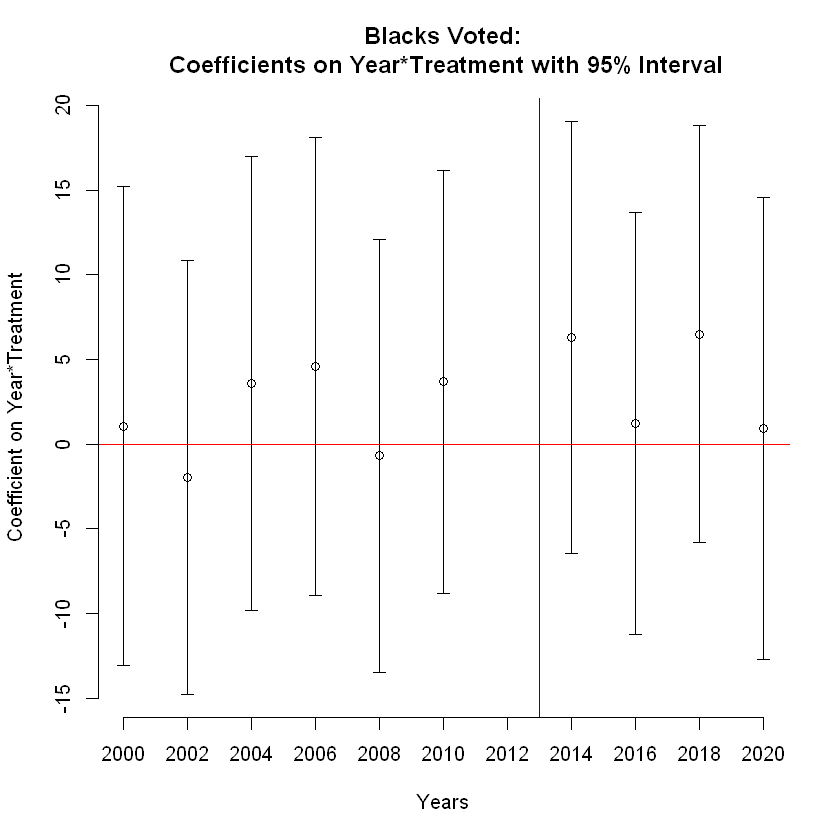

In [145]:
variable_names <- grep("^is_\\d{4}:Treatment", rownames(summary_table), value = TRUE)

# Extract coefficients and standard errors for these variables
coefficients <- summary_table[variable_names, "Estimate"]
std_errors <- summary_table[variable_names, "Std. Error"]

# Combine coefficients and standard errors into a list
coefficients_numeric <- as.numeric(coefficients)
std_errors_numeric <- as.numeric(std_errors)


# Create a vector of years
years <- c(2000, 2002, 2004, 2006, 2008, 2010, 2014, 2016, 2018, 2020)

# Plot coefficients with error bars
plot(years, coefficients_numeric, type = "p", ylim = c(min(coefficients_numeric - 1.96*std_errors_numeric), max(coefficients_numeric + 1.96*std_errors_numeric)), 
     xlab = "Years", ylab = "Coefficient on Year*Treatment", main = "Blacks Voted:\n Coefficients on Year*Treatment with 95% Interval", xlim=c(2000,2020), axes=FALSE)

# Add error bars
for (i in 1:length(years)) {
  arrows(years[i], coefficients_numeric[i] - 1.96*std_errors_numeric[i], 
         years[i], coefficients_numeric[i] + 1.96*std_errors_numeric[i], 
         angle = 90, code = 3, length = 0.05)
}

# Add a line at y=0
abline(h = 0, col = "red")

# Add a line at x=2013
abline(v = 2013, col = "blue")
axis(1, at = seq(2000, 2020, by = 2))

# Adding y-axis
axis(2)


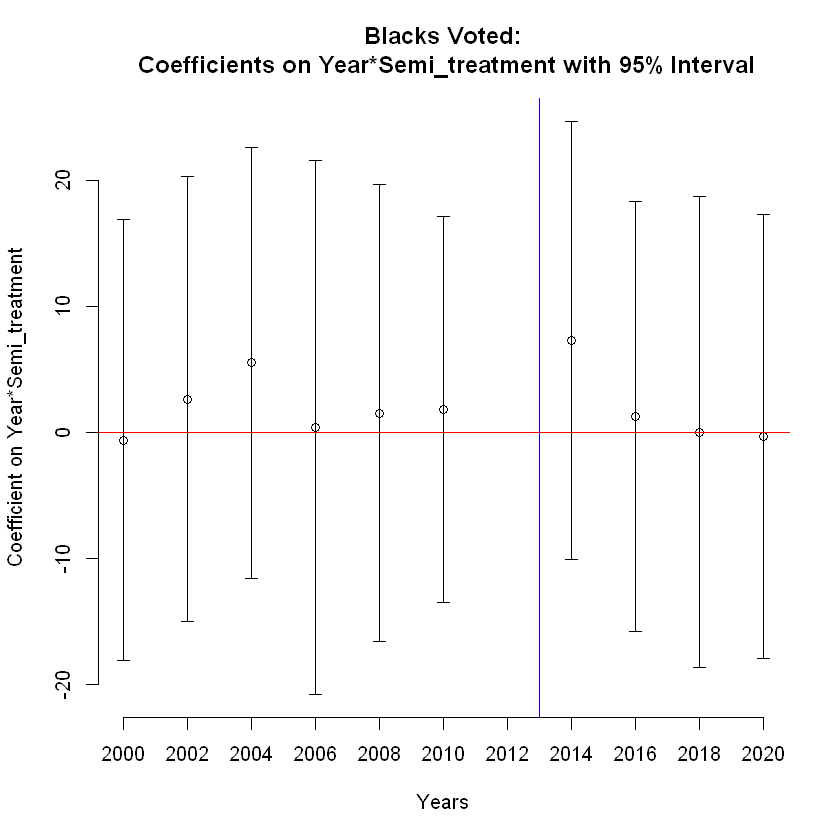

In [146]:
variable_names <- grep("^is_\\d{4}:Semi_treatment", rownames(summary_table), value = TRUE)

# Extract coefficients and standard errors for these variables
coefficients <- summary_table[variable_names, "Estimate"]
std_errors <- summary_table[variable_names, "Std. Error"]

# Combine coefficients and standard errors into a list
coefficients_numeric <- as.numeric(coefficients)
std_errors_numeric <- as.numeric(std_errors)


# Create a vector of years
years <- c(2000, 2002, 2004, 2006, 2008, 2010, 2014, 2016, 2018, 2020)

# Plot coefficients with error bars
plot(years, coefficients_numeric, type = "p", ylim = c(min(coefficients_numeric - 1.96*std_errors_numeric), max(coefficients_numeric + 1.96*std_errors_numeric)), 
     xlab = "Years", ylab = "Coefficient on Year*Semi_treatment", main = "Blacks Voted:\n Coefficients on Year*Semi_treatment with 95% Interval", xlim=c(2000,2020), axes=FALSE)

# Add error bars
for (i in 1:length(years)) {
  arrows(years[i], coefficients_numeric[i] - 1.96*std_errors_numeric[i], 
         years[i], coefficients_numeric[i] + 1.96*std_errors_numeric[i], 
         angle = 90, code = 3, length = 0.05)
}

# Add a line at y=0
abline(h = 0, col = "red")

# Add a line at x=2013
abline(v = 2013, col = "blue")
axis(1, at = seq(2000, 2020, by = 2))

# Adding y-axis
axis(2)

## Difference between White and Black

In [147]:
#Pooled regression
options(scipen = 999)
model <- lm(Dif_WhiteBlack ~ post_2013 + Treatment + Semi_treatment + post_2013*Treatment + post_2013*Semi_treatment+ pres_year + swing_ever + senate + 
             Percent_25andOver_BachelororMore_2006to2008  + TotCPop_Blackaloneorincombination_2012 +TotCPop_Whitealoneorincombination_2012 +
            + rGDPperCap_2012 + Covid_mrate_2020, data = final)

# Obtain robust standard errors
robust_se <- sqrt(diag(vcovHC(model)))

# Print summary output table with robust standard errors
summary_table <- coeftest(model, vcov = vcovHC(model))
print(summary_table)


t test of coefficients:

                                                 Estimate    Std. Error t value
(Intercept)                                  0.5334540029  4.1851055488  0.1275
post_2013                                    0.9227435855  1.5019958410  0.6143
Treatment                                    4.3127139271  1.6375787767  2.6336
Semi_treatment                              10.9694070187  2.4707144168  4.4398
pres_year                                   -3.5311728894  1.1445148465 -3.0853
swing_ever                                   1.4923553677  1.4903504040  1.0013
senate                                       0.9938826111  1.2389170196  0.8022
Percent_25andOver_BachelororMore_2006to2008  0.6416874480  0.1847891528  3.4725
TotCPop_Blackaloneorincombination_2012      -0.0120859324  0.0013017688 -9.2842
TotCPop_Whitealoneorincombination_2012       0.0000754117  0.0001931402  0.3905
rGDPperCap_2012                              0.0000039712  0.0001267969  0.0313
Covid_mrate_20

In [148]:
summary(model)


Call:
lm(formula = Dif_WhiteBlack ~ post_2013 + Treatment + Semi_treatment + 
    post_2013 * Treatment + post_2013 * Semi_treatment + pres_year + 
    swing_ever + senate + Percent_25andOver_BachelororMore_2006to2008 + 
    TotCPop_Blackaloneorincombination_2012 + TotCPop_Whitealoneorincombination_2012 + 
    +rGDPperCap_2012 + Covid_mrate_2020, data = final)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.435  -7.244  -1.162   5.364  57.988 

Coefficients:
                                                Estimate   Std. Error t value
(Intercept)                                  0.533454003  4.643428295   0.115
post_2013                                    0.922743585  1.421157246   0.649
Treatment                                    4.312713927  2.308024018   1.869
Semi_treatment                              10.969407019  2.633423779   4.165
pres_year                                   -3.531172889  1.149508196  -3.072
swing_ever                                   1.492355368  1

In [149]:
nobs(model)

[1] 550

## Yearly Regression

In [150]:
#Pooled regression
options(scipen = 999)
model <- lm(Dif_WhiteBlack ~ is_2000 + is_2002 + is_2004  + is_2006 + is_2008 + is_2010  + is_2014 + is_2016
            + is_2018 + is_2020 + Treatment + Semi_treatment+ (is_2000*Treatment) + (is_2002*Treatment) + (is_2004*Treatment) + (is_2006*Treatment)+
             (is_2008*Treatment)+ (is_2010*Treatment)  + (is_2014*Treatment)+
            (is_2016*Treatment)+ (is_2018*Treatment)+ (is_2020*Treatment) + (is_2000*Semi_treatment) + (is_2002*Semi_treatment) 
            + (is_2004*Semi_treatment) + (is_2006*Semi_treatment)+
             (is_2008*Semi_treatment)+ (is_2010*Semi_treatment)  + (is_2014*Semi_treatment)+
            (is_2016*Semi_treatment)+ (is_2018*Semi_treatment)+ (is_2020*Semi_treatment) + pres_year + swing_ever + senate + 
            rGDPperCap_2012 + Percent_25andOver_BachelororMore_2006to2008 + TotCPop_Blackaloneorincombination_2012+
            TotCPop_Whitealoneorincombination_2012+
            Covid_mrate_2020,
            data = final)

# Obtain robust standard errors
robust_se <- sqrt(diag(vcovHC(model)))

# Print summary output table with robust standard errors
summary_table <- coeftest(model, vcov = vcovHC(model))
summary_table


t test of coefficients:

                                                  Estimate     Std. Error
(Intercept)                                 -7.12657196793  5.01891612810
is_2000                                      6.41999630614  4.41570282825
is_2002                                      5.85819641987  3.61876241354
is_2004                                      9.76258407505  3.84424052701
is_2006                                     14.47468996715  3.70741139676
is_2008                                     -1.45368858451  3.46945399449
is_2010                                      6.61656450375  3.29779840324
is_2014                                      9.58035088700  3.21258680637
is_2016                                      4.24940501208  3.31365330055
is_2018                                      7.48084902481  3.33347665061
is_2020                                      7.19599915399  3.66632485057
Treatment                                    7.33203283640  4.01220783060
Semi_treatme

In [151]:
summary(model)


Call:
lm(formula = Dif_WhiteBlack ~ is_2000 + is_2002 + is_2004 + is_2006 + 
    is_2008 + is_2010 + is_2014 + is_2016 + is_2018 + is_2020 + 
    Treatment + Semi_treatment + (is_2000 * Treatment) + (is_2002 * 
    Treatment) + (is_2004 * Treatment) + (is_2006 * Treatment) + 
    (is_2008 * Treatment) + (is_2010 * Treatment) + (is_2014 * 
    Treatment) + (is_2016 * Treatment) + (is_2018 * Treatment) + 
    (is_2020 * Treatment) + (is_2000 * Semi_treatment) + (is_2002 * 
    Semi_treatment) + (is_2004 * Semi_treatment) + (is_2006 * 
    Semi_treatment) + (is_2008 * Semi_treatment) + (is_2010 * 
    Semi_treatment) + (is_2014 * Semi_treatment) + (is_2016 * 
    Semi_treatment) + (is_2018 * Semi_treatment) + (is_2020 * 
    Semi_treatment) + pres_year + swing_ever + senate + rGDPperCap_2012 + 
    Percent_25andOver_BachelororMore_2006to2008 + TotCPop_Blackaloneorincombination_2012 + 
    TotCPop_Whitealoneorincombination_2012 + Covid_mrate_2020, 
    data = final)

Residuals:
    Min   

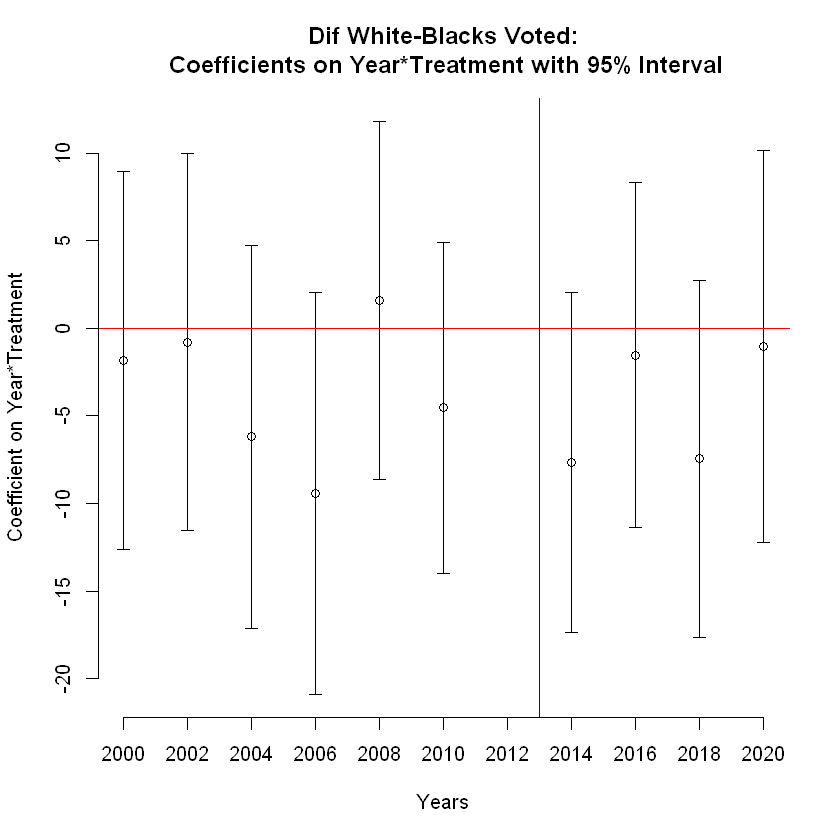

In [153]:
variable_names <- grep("^is_\\d{4}:Treatment", rownames(summary_table), value = TRUE)

# Extract coefficients and standard errors for these variables
coefficients <- summary_table[variable_names, "Estimate"]
std_errors <- summary_table[variable_names, "Std. Error"]

# Combine coefficients and standard errors into a list
coefficients_numeric <- as.numeric(coefficients)
std_errors_numeric <- as.numeric(std_errors)


# Create a vector of years
years <- c(2000, 2002, 2004, 2006, 2008, 2010, 2014, 2016, 2018, 2020)

# Plot coefficients with error bars
plot(years, coefficients_numeric, type = "p", ylim = c(min(coefficients_numeric - 1.96*std_errors_numeric), max(coefficients_numeric + 1.96*std_errors_numeric)), 
     xlab = "Years", ylab = "Coefficient on Year*Treatment", main = "Dif White-Blacks Voted:\n Coefficients on Year*Treatment with 95% Interval", xlim=c(2000,2020), axes=FALSE)

# Add error bars
for (i in 1:length(years)) {
  arrows(years[i], coefficients_numeric[i] - 1.96*std_errors_numeric[i], 
         years[i], coefficients_numeric[i] + 1.96*std_errors_numeric[i], 
         angle = 90, code = 3, length = 0.05)
}

# Add a line at y=0
abline(h = 0, col = "red")

# Add a line at x=2013
abline(v = 2013, col = "blue")
axis(1, at = seq(2000, 2020, by = 2))

# Adding y-axis
axis(2)


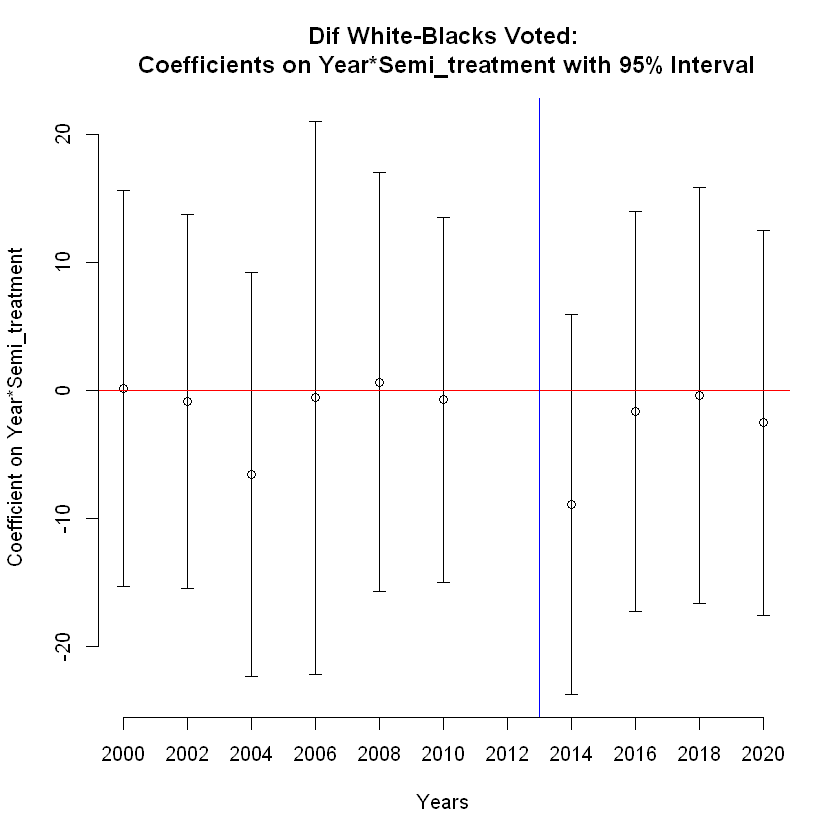

In [154]:
variable_names <- grep("^is_\\d{4}:Semi_treatment", rownames(summary_table), value = TRUE)

# Extract coefficients and standard errors for these variables
coefficients <- summary_table[variable_names, "Estimate"]
std_errors <- summary_table[variable_names, "Std. Error"]

# Combine coefficients and standard errors into a list
coefficients_numeric <- as.numeric(coefficients)
std_errors_numeric <- as.numeric(std_errors)


# Create a vector of years
years <- c(2000, 2002, 2004, 2006, 2008, 2010, 2014, 2016, 2018, 2020)

# Plot coefficients with error bars
plot(years, coefficients_numeric, type = "p", ylim = c(min(coefficients_numeric - 1.96*std_errors_numeric), max(coefficients_numeric + 1.96*std_errors_numeric)), 
     xlab = "Years", ylab = "Coefficient on Year*Semi_treatment", main = "Dif White-Blacks Voted:\n Coefficients on Year*Semi_treatment with 95% Interval", xlim=c(2000,2020), axes=FALSE)

# Add error bars
for (i in 1:length(years)) {
  arrows(years[i], coefficients_numeric[i] - 1.96*std_errors_numeric[i], 
         years[i], coefficients_numeric[i] + 1.96*std_errors_numeric[i], 
         angle = 90, code = 3, length = 0.05)
}

# Add a line at y=0
abline(h = 0, col = "red")

# Add a line at x=2013
abline(v = 2013, col = "blue")
axis(1, at = seq(2000, 2020, by = 2))

# Adding y-axis
axis(2)